# Análisis geográfico 

## ¿Dónde se producen la mayor cantidad de clicks por longitud y latitud?

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [41]:
%matplotlib inline

plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid")

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.stats import gaussian_kde

In [3]:
clicks = pd.read_csv("clicks.csv", dtype={"source_id":"int8", "advertiser_id":"int8"})

In [14]:
events_dtypes = {'event_id': 'category', 'ref_type': 'category', 'application_id': 'category',
                  'device_countrycode': 'category', 'device_os_version': 'category',
                   'device_brand' : 'category', 'device_model' : 'category', 'device_city': 'category', 'session_user_agent': 'category', 'user_agent': 'category', 'carrier': 'category',
                   'kind': 'category', 'device_os' : 'category', 'wifi': 'category', 'connection_type': 'category',
                   'device_language': 'category'}

events = pd.read_csv('events.csv', dtype = events_dtypes, low_memory=False)

events["date"] =  pd.to_datetime(events["date"], errors = "coerce")

In [4]:
latitude = clicks["latitude"].values
longitude = clicks["longitude"].values

In [5]:
lat_long = np.vstack([latitude,longitude])
z = gaussian_kde(lat_long)(lat_long)

In [7]:
n = 10
fig, ax = plt.subplots(figsize=(n*latitude.max(), n*longitude.max()))
plt.title("Longitud y latitud")
ax.scatter(latitude, longitude, c=z, cmap="inferno", s=10, edgecolor="");
plt.savefig("latitudLongitud.png")

## ¿Cuáles son las 20 ciudades con mejor promedio de eventos por usuario?

In [25]:
events['cant'] = 1
top_cities = events.groupby(['device_city', 'ref_hash']).agg({'cant': 'count'}).reset_index().groupby('device_city').agg({'cant': 'mean'})\
    .sort_values(by = 'cant', ascending = False).head(20).reset_index()

In [37]:
top_cities = top_cities.rename({'cant':'promedio'}, axis = 1)

Text(0, 0.5, 'Promedio')

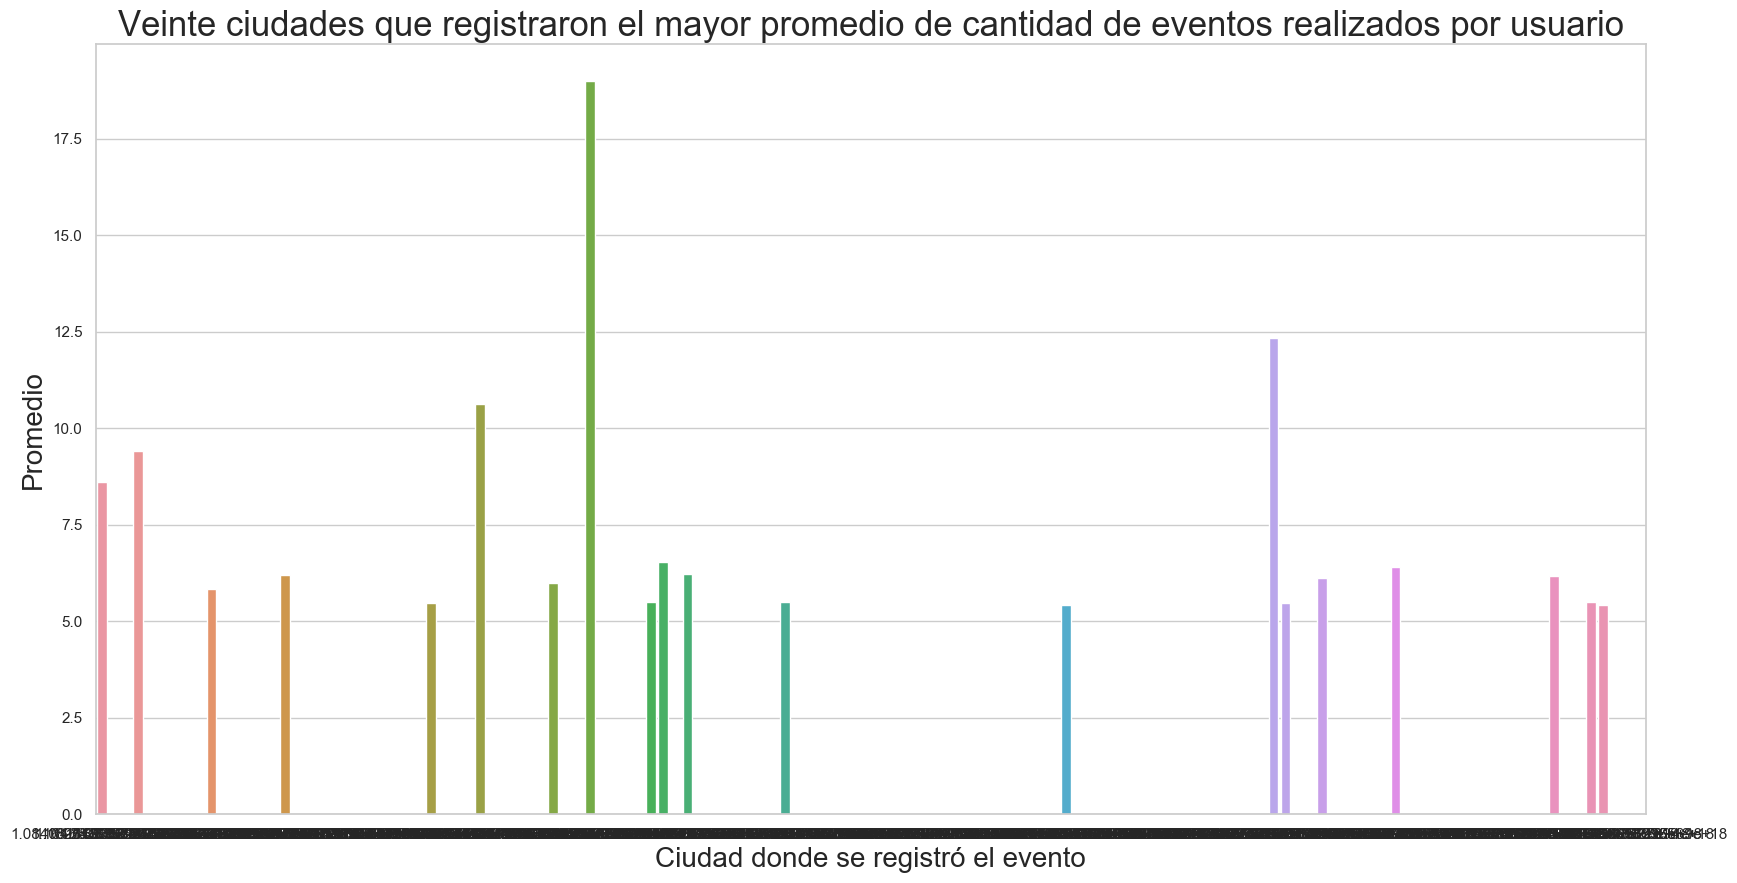

In [43]:
plt.rcParams["axes.labelsize"] = 30   
plot = sns.barplot(x=top_cities['device_city'], y=top_cities['promedio'], orient='v')
plot.set_title("Veinte ciudades que registraron el mayor promedio de cantidad de eventos realizados por usuario", fontsize=25)
plot.set_xlabel("Ciudad donde se registró el evento", fontsize=20)
plot.set_ylabel("Promedio", fontsize=20)

## ¿Cuáles son las ciudades donde se producen la mayor parte de las conversiones?